## 調整畫布的佈景主題
調整畫布的佈景主題（theme）是讓視覺化立即改頭換面的捷徑，佈景主題涵蓋背景顏色、字型大小與線條樣式等整體外觀的調整。在 Python 中我們可以
查看 pyplot 的 style.available 屬性，暸解能夠使用哪些佈景主題。

In [0]:
import matplotlib.pyplot as plt

style_available = plt.style.available
print("可以使用 {} 個佈景主題。".format(len(style_available)))
print(style_available)

可以使用 26 個佈景主題。
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


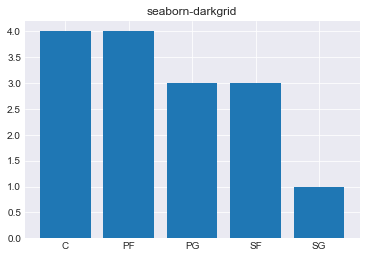

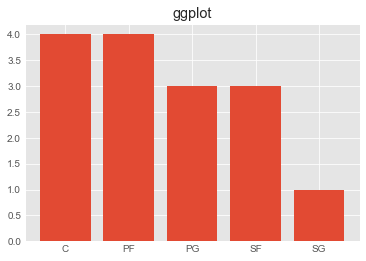

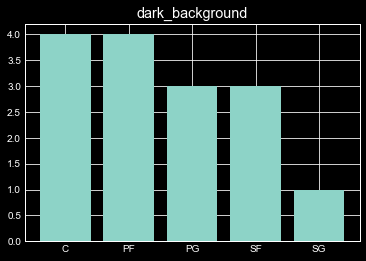

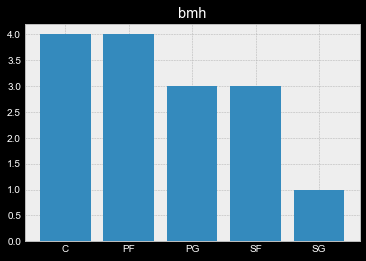

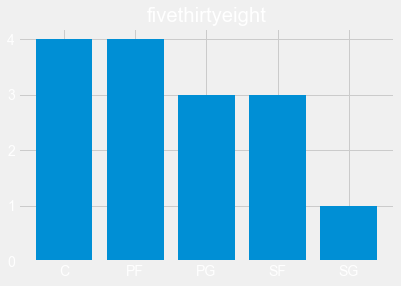

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")#使用groupby()方法可以將資料依照自己要的column分組
pos = grouped["Pos"].count()
plt_themes = ["seaborn-darkgrid", "ggplot", "dark_background", "bmh", "fivethirtyeight"]

for i in range(5):
  plt.style.use(plt_themes[i])
  plt.bar(range(1, 6), pos)
  plt.xticks(range(1, 6), pos.index)#设置坐标轴刻度
  plt.title(plt_themes[i])
  plt.show()
  print("\n")

## 加入圖標題與軸標籤
一個敘述得當的圖標題能夠為探索性分析帶來畫龍點睛的效果，在 Python 中利用 plt.title() 可以加入正常標題、 plt.suptitle() 可以加入一個畫布
更上方的置中標題，讓標題具有兩個層級，一個大標與一個副標；而 plt.xlabel() 與 plt.ylabel() 則可以分別為 X 軸 與 Y 軸加上變數名稱與單位的
敘述

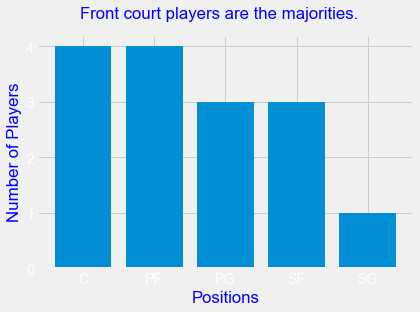

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()

plt.bar(range(1, 6), pos)
plt.xticks(range(1, 6), pos.index)
plt.suptitle("Front court players are the majorities.",c = 'b')
#plt.title("Chicago Bulls is relatively weak in the paint." ,c = 'b')
plt.xlabel("Positions" ,c = 'b')
plt.ylabel("Number of Players" ,c = 'b')
plt.show()

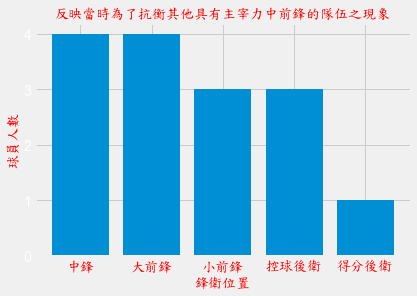

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()

# 可以顯示中文
myfont = FontProperties(fname="/Windows/Fonts/kaiu.ttf")
plt.bar(range(1, 6), pos)
plt.xticks(range(1, 6), ["中鋒", "大前鋒", "小前鋒", "控球後衛", "得分後衛"], fontproperties=myfont ,c = 'r')
#plt.suptitle("前場球員為芝加哥公牛隊的大宗", fontproperties=myfont ,c = 'r')
plt.title("反映當時為了抗衡其他具有主宰力中前鋒的隊伍之現象", fontproperties=myfont ,c = 'r')
plt.xlabel("鋒衛位置", fontproperties=myfont , c = 'r')
plt.ylabel("球員人數", fontproperties=myfont ,c = 'r')
plt.show()

## 加入註釋
除了標準的圖標題與軸標籤能幫助資料科學團隊解讀探索性資料分析，我們還可以在繪圖中加入凸顯資訊的元件，像是用來註釋描述性資訊的文字、標註
重要數值的水平或垂直線、強調某區域的陰影或是指出特定資料點的箭頭等。在 Python 中可以使用 plt.text() 方法指定文字內容與擺放文字的 座標位置，像是將 1995 至 1996 年球季的芝加哥公牛隊各個鋒衛位置的平均每場得分長條圖上方加入得分的數值，特別注意的是擺放文字之位置要 做微幅調整，否則會造成註釋文字恰好貼齊長條或者座標軸的情況。

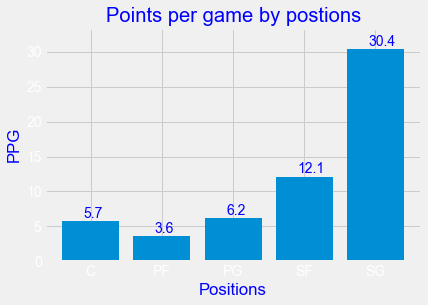

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

per_game_url = "https://storage.googleapis.com/ds_data_import/stats_per_game_chicago_bulls_1995_1996.csv"
player_info_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
per_game = pd.read_csv(per_game_url)
player_info = pd.read_csv(player_info_url)
df = pd.merge(player_info, per_game[["Name", "PTS/G"]], left_on="Player", right_on="Name")#進行資料合併
grouped = df.groupby("Pos")
points_per_game = grouped["PTS/G"].mean()

plt.bar([1, 2, 3, 4, 5], points_per_game)
plt.xticks([1, 2, 3, 4, 5], points_per_game.index)
plt.ylim(0, points_per_game.max() + 3)
plt.title("Points per game by postions" ,c = 'b')
plt.xlabel("Positions" ,c = 'b')
plt.ylabel("PPG" ,c = 'b')
for i, v in enumerate(points_per_game):
  plt.text(i + 0.9, v + 0.5, "{:.1f}".format(v) ,c = 'b')
plt.show()

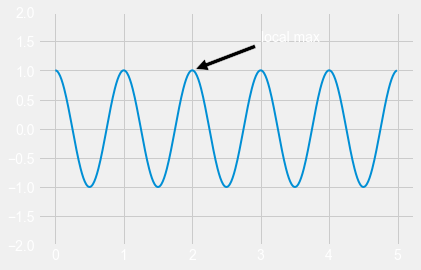

In [0]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# 繪製一個餘弦曲線
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

# 繪製一個黑色，兩端縮排的箭頭
ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            xycoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.set_ylim(-2, 2)
plt.show()

In [0]:
# Axes.annotate(s, xy, *args, **kwargs)

# s：註釋文字的內容
# xy：被註釋的座標點，二維元組形如(x,y)
# xytext：註釋文字的座標點，也是二維元組，預設與xy相同
# xycoords：被註釋點的座標系屬性，允許輸入的值如下

# 屬性值	含義
# 'figure points'	以繪圖區左下角為參考，單位是點數
# 'figure pixels'	以繪圖區左下角為參考，單位是畫素數
# 'figure fraction'	以繪圖區左下角為參考，單位是百分比
# 'axes points'	以子繪圖區左下角為參考，單位是點數（一個figure可以有多個axex，預設為1個）
# 'axes pixels'	以子繪圖區左下角為參考，單位是畫素數
# 'axes fraction'	以子繪圖區左下角為參考，單位是百分比
# 'data'	以被註釋的座標點xy為參考 (預設值)
# 'polar'	不使用本地資料座標系，使用極座標系

# arrowprops：箭頭的樣式，dict（字典）型資料，如果該屬性非空，則會在註釋文字和被註釋點之間畫一個箭頭。如果不設定'arrowstyle' 關鍵字，
# 則允許包含以下關鍵字：

# 關鍵字	說明
# width	箭頭的寬度（單位是點）
# headwidth	箭頭頭部的寬度（點）
# headlength	箭頭頭部的長度（點）
# shrink	箭頭兩端收縮的百分比（佔總長）
# 如果設定了‘arrowstyle’關鍵字，以上關鍵字就不能使用。允許的值有：

# 箭頭的樣式	屬性
# '-'	None
# '->'	head_length=0.4,head_width=0.2
# '-['	widthB=1.0,lengthB=0.2,angleB=None
# '|-|'	widthA=1.0,widthB=1.0
# '-|>'	head_length=0.4,head_width=0.2
# '<-'	head_length=0.4,head_width=0.2
# '<->'	head_length=0.4,head_width=0.2
# '<|-'	head_length=0.4,head_width=0.2
# '<|-|>'	head_length=0.4,head_width=0.2
# 'fancy'	head_length=0.4,head_width=0.4,tail_width=0.4
# 'simple'	head_length=0.5,head_width=0.5,tail_width=0.2
# 'wedge'	tail_width=0.3,shrink_factor=0.5
# Key	Description
# arrowstyle	箭頭的樣式
# connectionstyle	連線線的樣式
# relpos	
# 箭頭起始點相對註釋文字的位置，預設為 (0.5, 0.5)，即文字的中心，

# （0，0）表示左下角，（1，1）表示右上角

# patchA	箭頭起點處的圖形（matplotlib.patches物件），預設是註釋文字框
# patchB	箭頭終點處的圖形（matplotlib.patches物件），預設為空
# shrinkA	箭頭起點的縮排點數，預設為2
# shrinkB	箭頭終點的縮排點數，預設為2
# mutation_scale	default is text size (in points)
# mutation_aspect	default is 1.

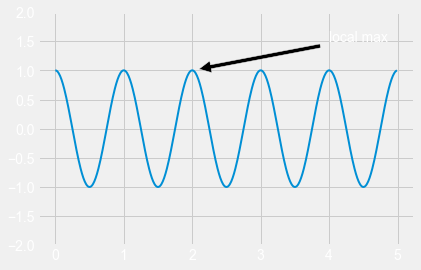

In [0]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# 繪製一個餘弦曲線
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

# 繪製一個黑色，兩端縮排的箭頭
ax.annotate('local max', xy=(2, 1), xytext=(4, 1.5),
            xycoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.set_ylim(-2, 2)
plt.show()

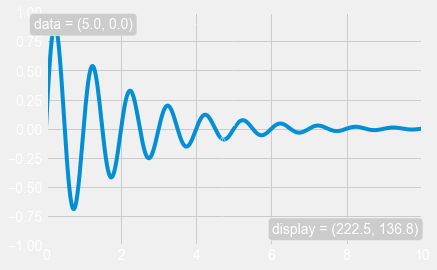

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 以步長0.005繪製一個曲線
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

# 被註釋點的資料軸座標和所在的畫素
xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))

# 設定註釋文字的樣式和箭頭的樣式
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

# 設定偏移量
offset = 100
# xycoords預設為'data'資料軸座標，對座標點（5,0）添加註釋
# 註釋文字參考被註釋點設定偏移量，向左2*72points，向上72points
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

# xycoords以繪圖區左下角為參考，單位為畫素
# 註釋文字參考被註釋點設定偏移量，向右0.5*72points，向下72points
disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

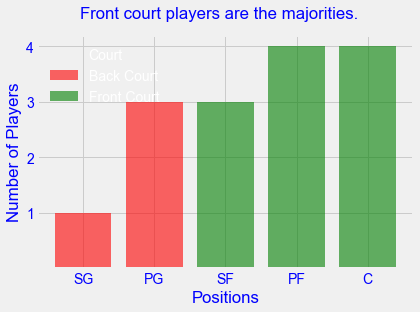

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped.count()
bar_1 = pos["Player"].loc[["SG", "PG"]].values
bar_2 = pos["Player"].loc[["SF", "PF", "C"]].values

plt.bar(range(1, 3), bar_1, label="Back Court", alpha=0.6, color="red")
plt.bar(range(3, 6), bar_2, label="Front Court", alpha=0.6, color="green")
plt.legend(title = "Court" ,loc = 2 ) # 加入圖例 可以用0~10標示位置
plt.xticks(range(1, 6), ["SG", "PG", "SF", "PF", "C"],c = 'b') # 調整 X 軸刻度線與刻度線標籤
plt.yticks(range(1, 5) ,c = 'b') # 調整 Y 軸刻度線與刻度線標籤

plt.suptitle("Front court players are the majorities.", c = 'b')
plt.xlabel("Positions" ,c = 'b')
plt.ylabel("Number of Players", c = 'b')
plt.show()
